In [1]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Diabetic.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()
df.describe()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


(768, 9)

In [4]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


(array([[768.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [ 72., 625.,  71.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [656., 112.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [767.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [487., 155.,  70.,  30.,   8.,   9.,   5.,   1.,   2.,   1.],
        [768.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [768.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [768.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [768.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]]),
 array([  0. ,  84.6, 169.2, 253.8, 338.4, 423. , 507.6, 592.2, 676.8,
        761.4, 846. ]),
 <a list of 9 BarContainer objects>)

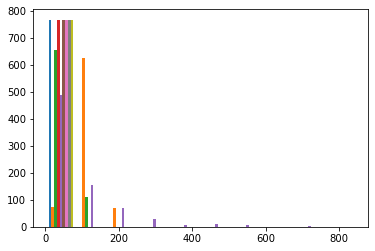

In [5]:
plt.hist(df)

In [6]:
y = df["Outcome"].values
x = df.drop(["Outcome"],axis=1)
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
data_df = ss.fit_transform(df)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,random_state=5)

train_score = []
test_score = []
k_vals = []


In [8]:
for k in range(1, 21):
    k_vals.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    
    tr_score = knn.score(X_train, y_train)
    train_score.append(tr_score)
    
    te_score = knn.score(X_test, y_test)
    test_score.append(te_score)


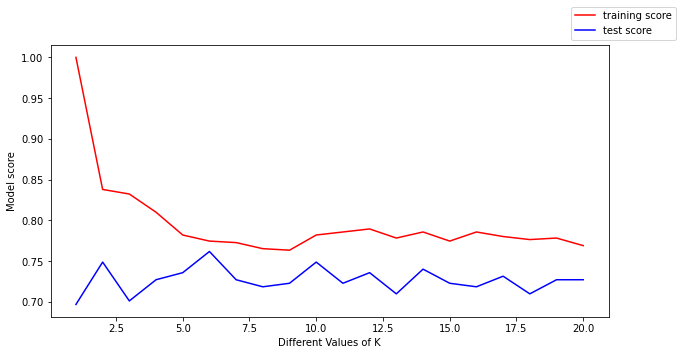

In [9]:
plt.figure(figsize=(10,5))
plt.xlabel('Different Values of K')
plt.ylabel('Model score')
plt.plot(k_vals, train_score, color = 'r', label = "training score")
plt.plot(k_vals, test_score, color = 'b', label = 'test score')
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()    


In [10]:
knn = KNeighborsClassifier(n_neighbors = 15)

In [11]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [12]:
knn.score(X_test,y_test)

0.7229437229437229

In [13]:
y_pred=knn.predict(X_test)
print("accuracy ",accuracy_score(y_test,y_pred))
print("Max test accuracy at k = ", test_score.index(max(test_score))+1)

accuracy  0.7229437229437229
Max test accuracy at k =  6


In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.78      0.80       160
           1       0.55      0.59      0.57        71

    accuracy                           0.72       231
   macro avg       0.68      0.69      0.68       231
weighted avg       0.73      0.72      0.73       231



In [15]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver="lbfgs",max_iter=1000)
lr.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [16]:
y_p=lr.predict(X_test)
print("accuracy with logistic",accuracy_score(y_test,y_p))

accuracy with logistic 0.7835497835497836


In [17]:
print(classification_report(y_test,y_p))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84       160
           1       0.64      0.66      0.65        71

    accuracy                           0.78       231
   macro avg       0.75      0.75      0.75       231
weighted avg       0.79      0.78      0.78       231

